In [91]:
# The libraries
import pandas as pd
import numpy as np

# visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# models
import sklearn
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Pipline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

# metrics
import sklearn.metrics as metrics

# to save model
import joblib

In [92]:
# Versions
print("scikit-learn version:", sklearn.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("xgboost version:", xgboost.__version__)
print("joblib version:", joblib.__version__)


scikit-learn version: 1.6.1
pandas version: 2.2.3
numpy version: 2.0.1
matplotlib version: 3.10.1
seaborn version: 0.13.2
xgboost version: 2.1.1
joblib version: 1.4.2


## Project Overview

This project aims to build a robust and professional machine learning pipeline for classifying iris flower species using the renowned Iris dataset. The workflow includes comprehensive data exploration, preprocessing, feature engineering, model selection, and evaluation using state-of-the-art algorithms such as Random Forest, XGBoost, CatBoost, and Support Vector Machines. 

Key steps in the project:

- **Exploratory Data Analysis (EDA):** Visualizing and understanding the distribution and relationships of features.
- **Data Preprocessing:** Handling missing values, encoding categorical variables, and scaling features to prepare the data for modeling.
- **Model Development:** Implementing and comparing multiple classification algorithms to identify the best-performing model.
- **Model Evaluation:** Using cross-validation and various metrics (accuracy, precision, recall, F1-score) to assess model performance.
- **Interpretability:** Analyzing feature importance and model decisions to ensure transparency.
- **Deployment:** Saving the trained model for future predictions.

This end-to-end workflow demonstrates best practices in data science and machine learning, making it suitable for real-world applications and professional environments.

You can get the dataset from [here](https://www.kaggle.com/datasets/uciml/iris). 

In [93]:
df = pd.read_csv('Iris.csv', index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [95]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Dataset Description

The Iris dataset consists of 150 samples of iris flowers, each described by four numerical features and a categorical target:

- **Id**: Unique identifier for each sample.
- **SepalLengthCm**: Sepal length in centimeters.
- **SepalWidthCm**: Sepal width in centimeters.
- **PetalLengthCm**: Petal length in centimeters.
- **PetalWidthCm**: Petal width in centimeters.
- **Species**: The species of the iris flower (Iris-setosa, Iris-versicolor, or Iris-virginica).

All feature columns are complete with no missing values. The dataset is widely used for classification tasks and is a standard benchmark in machine learning.

## Visualization

In [96]:
species_rate = df['Species'].value_counts()
species_rate

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

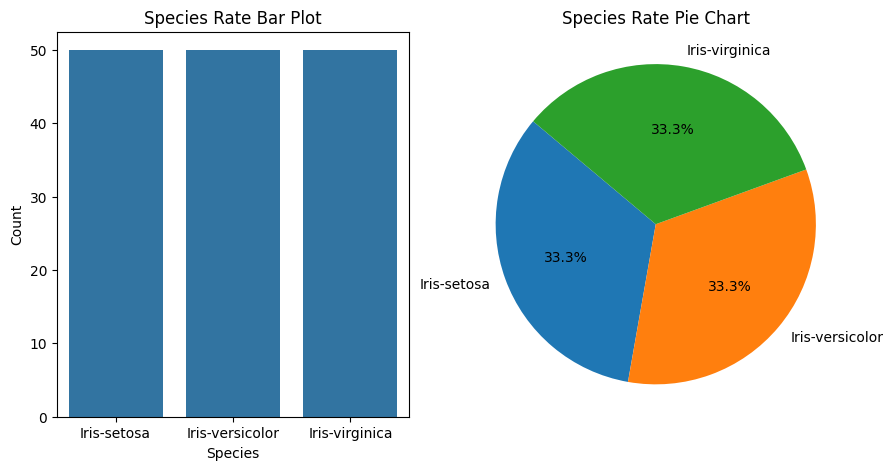

In [97]:
# plotting the species rate with bar plot and pie chart
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=species_rate.index, y=species_rate.values)
plt.title('Species Rate Bar Plot')
plt.xlabel('Species')       
plt.ylabel('Count') 
plt.subplot(1, 2, 2)
plt.pie(species_rate, labels=species_rate.index, autopct='%1.1f%%', startangle=140)
plt.title('Species Rate Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From the plots the target columns is balnaced.

**Now let's plot other columns**


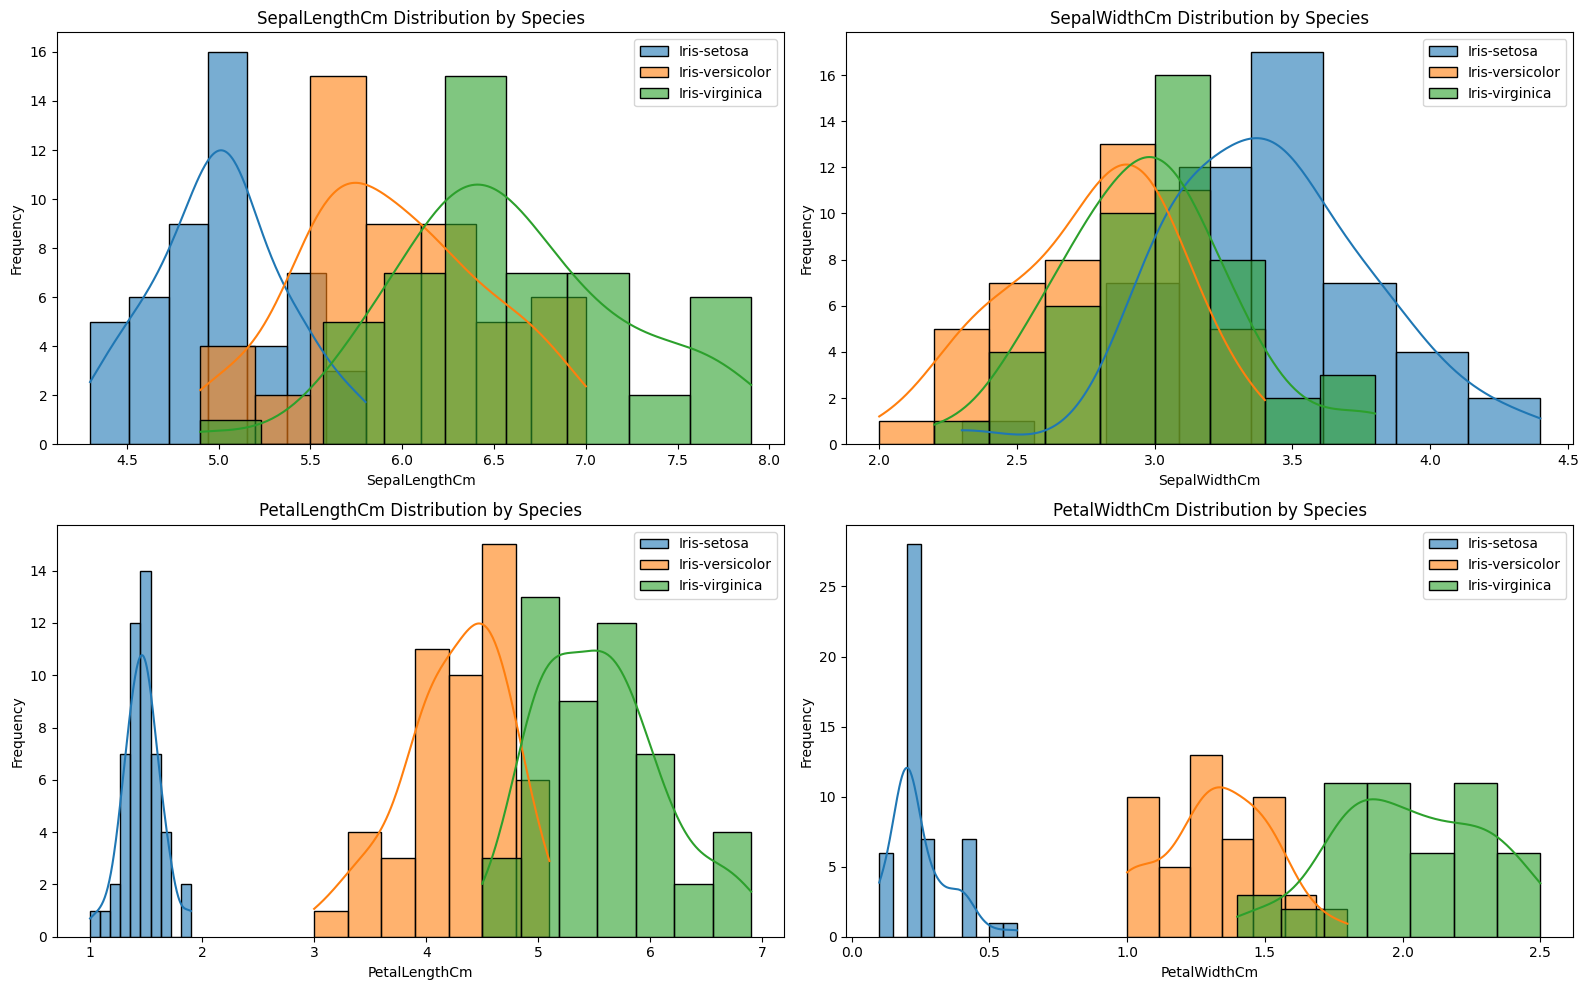

In [98]:
# Plotting histograms for all numerical columns grouped by Species
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    for species in df['Species'].unique():
        sns.histplot(df[df['Species'] == species][col], label=species, kde=True, alpha=0.6)
    plt.title(f'{col} Distribution by Species')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

# ML

### Preparing the data for modeling

In [99]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
# turning the target column into numerical values
df['Species'] = df['Species'].map({'Iris-setosa': 0,
                                   'Iris-versicolor': 1,
                                   'Iris-virginica': 2})
# Splitting the data into features and target variable
X = df.drop(columns=['Species'])
y = df['Species']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  # 20% for testing
                                                    random_state=42,
                                                    stratify=y)

In [101]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")    


X_train shape: (120, 4), y_train shape: (120,)
X_test shape: (30, 4), y_test shape: (30,)


In [102]:
# let's see correlation matrix 
corr_matrix = df.corrwith(df['Species']).abs().sort_values(ascending=False)
corr_matrix

Species          1.000000
PetalWidthCm     0.956464
PetalLengthCm    0.949043
SepalLengthCm    0.782561
SepalWidthCm     0.419446
dtype: float64

## SVM

In [103]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667
F1 Score: 0.9665831244778613
Precision: 0.9696969696969696
Recall: 0.9666666666666667


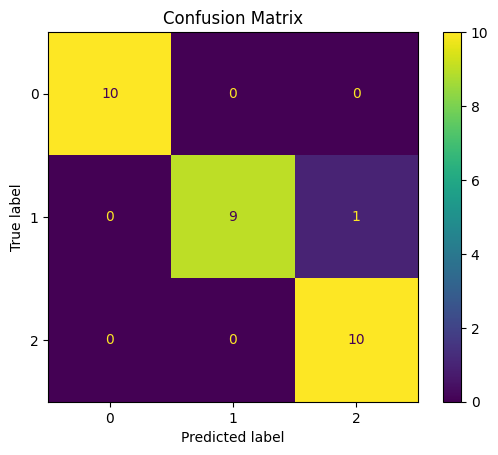

In [104]:
# performance metrics
y_pred = svm_clf.predict(X_test)
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average='weighted'))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))        
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix')
plt.show()

In [105]:
cross_val_scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
print(cross_val_scores.mean())
print(cross_val_scores.std())

0.975
0.02041241452319313


## RandomForestClassifier

In [106]:
RF_clf = RandomForestClassifier(random_state=42)
RF_clf.fit(X_train, y_train)    

RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Accuracy: 0.9
F1 Score: 0.8997493734335839
Precision: 0.9023569023569024
Recall: 0.9


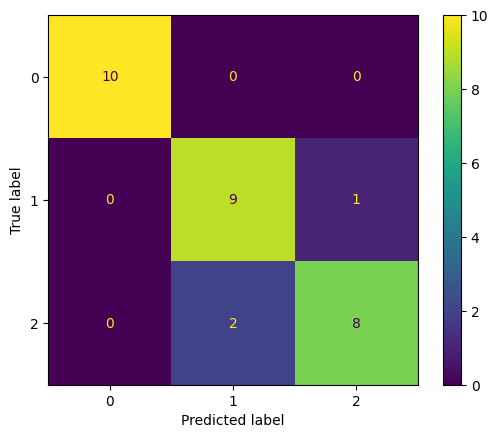

In [107]:
# performance of the model
y_pred_RF = RF_clf.predict(X_test)
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_RF))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_RF))
print("F1 Score:", metrics.f1_score(y_test, y_pred_RF, average='weighted'))
print("Precision:", metrics.precision_score(y_test, y_pred_RF, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred_RF, average='weighted'))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF)  
plt.show()


In [108]:
cross_val_scores = cross_val_score(RF_clf, X_train, y_train, cv=5, scoring='accuracy')
print(cross_val_scores.mean())
print(cross_val_scores.std())

0.95
0.016666666666666698


## GuassianNB

In [109]:
guassian_nb_clf = GaussianNB()
guassian_nb_clf.fit(X_train, y_train)

GaussianNB()

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667
F1 Score: 0.9665831244778613
Precision: 0.9696969696969696
Recall: 0.9666666666666667


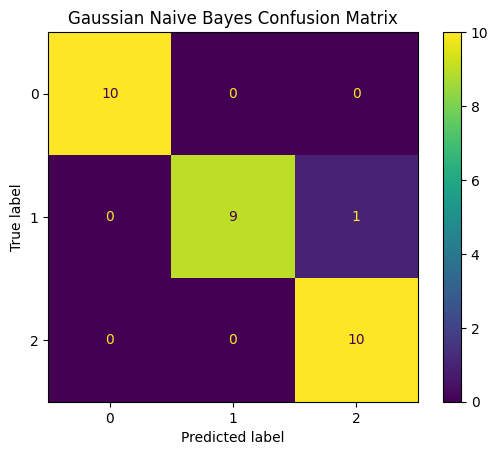

In [110]:
# performance of the model guassian Naive Bayes
y_pred_GNB = guassian_nb_clf.predict(X_test)
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_GNB))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_GNB)) 
print("F1 Score:", metrics.f1_score(y_test, y_pred_GNB, average='weighted'))
print("Precision:", metrics.precision_score(y_test, y_pred_GNB, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred_GNB, average='weighted'))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_GNB)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

In [111]:
cross_val_scores = cross_val_score(guassian_nb_clf, X_train, y_train, cv=5, scoring='accuracy')
print(cross_val_scores.mean())
print(cross_val_scores.std())

0.9583333333333334
0.026352313834736508


## DecisionTree

In [112]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 0.9333333333333333
F1 Score: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333


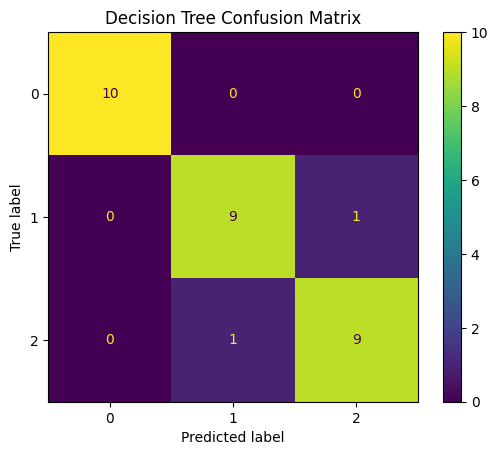

In [113]:
# performance of the model Decision Tree
y_pred_tree = tree_clf.predict(X_test)
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_tree))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("F1 Score:", metrics.f1_score(y_test, y_pred_tree, average='weighted'))
print("Precision:", metrics.precision_score(y_test, y_pred_tree, average='weighted'))   
print("Recall:", metrics.recall_score(y_test, y_pred_tree, average='weighted'))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [114]:
cross_val_scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')
print(cross_val_scores.mean())
print(cross_val_scores.std())

0.9416666666666668
0.020412414523193187


## LogisticRegression

In [115]:
LR_model = LogisticRegression(max_iter=1000, random_state=42)
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667
F1 Score: 0.9665831244778613
Precision: 0.9696969696969696
Recall: 0.9666666666666667


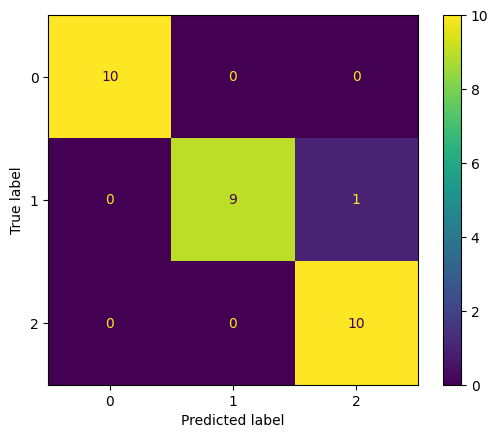

In [116]:
# performance of the Logistic Regression model
y_pred_LR = LR_model.predict(X_test)
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_LR))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_LR))
print("F1 Score:", metrics.f1_score(y_test, y_pred_LR, average  ='weighted'))
print("Precision:", metrics.precision_score(y_test, y_pred_LR, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred_LR, average='weighted'))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR)          
plt.show()


In [117]:
cross_val_scores = cross_val_score(LR_model, X_train, y_train, cv=5, scoring='accuracy')
print(cross_val_scores.mean())
print(cross_val_scores.std())

0.9666666666666668
0.016666666666666653


## BernoulliNB

In [118]:
bernulli_nb_clf = BernoulliNB(binarize=1.5)
bernulli_nb_clf.fit(X_train, y_train)

BernoulliNB(binarize=1.5)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.73      0.80      0.76        10
           2       0.82      0.90      0.86        10

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.84        30
weighted avg       0.85      0.83      0.84        30

Accuracy: 0.8333333333333334
F1 Score: 0.8359788359788358
Precision: 0.8484848484848484
Recall: 0.8333333333333334


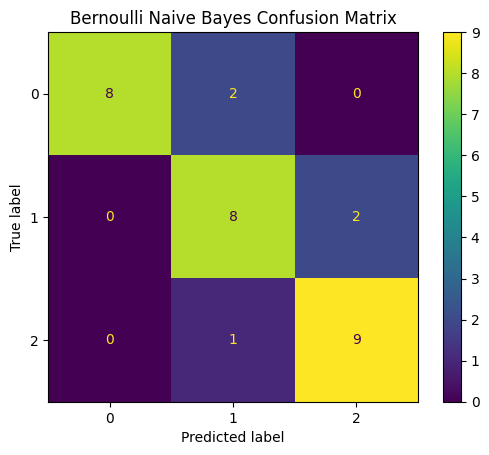

In [119]:
# performance of the model bernulli Naive Bayes
y_pred_BernoulliNB = bernulli_nb_clf.predict(X_test)
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_BernoulliNB))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_BernoulliNB))
print("F1 Score:", metrics.f1_score(y_test, y_pred_BernoulliNB, average='weighted'))
print("Precision:", metrics.precision_score(y_test, y_pred_BernoulliNB, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred_BernoulliNB, average='weighted'))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_BernoulliNB)
plt.title('Bernoulli Naive Bayes Confusion Matrix')
plt.show()

## About Multiclass Classification

In [120]:
df.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0


In [121]:
ovo = int(3 * (3 - 1) / 2) # there will be for 3 classes 3 classifiers
ovo

3

In [122]:
some_digit = df.iloc[0, 0:-1].values.reshape(1, -1)
pred = svm_clf.predict(some_digit)
print(f"Sample features: {some_digit}")
print(f"Predicted as: {pred[0]} (True label on dataset: {df.iloc[0, -1]})")

Sample features: [[5.1 3.5 1.4 0.2]]
Predicted as: 0 (True label on dataset: 0)


/home/doston/anaconda3/envs/california_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


As you can see, the sample flower is correctly classified.

In [123]:
some_digit_scores = svm_clf.decision_function(some_digit)
print(some_digit_scores)

[[ 2.23411532  1.14362339 -0.2523618 ]]


/home/doston/anaconda3/envs/california_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [124]:
# 2.23 is the won class's score
class_id = some_digit_scores.argmax()
print(f"Predicted class ID: {class_id}") 

Predicted class ID: 0


In [125]:
print(svm_clf.classes_)
print(svm_clf.classes_[class_id])

[0 1 2]
0


In [126]:
# forcing with scikit-learn to implement One-vs-Rest (OvR) strategy
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(random_state=42))

In [127]:
ovr_clf.predict(some_digit)

/home/doston/anaconda3/envs/california_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/doston/anaconda3/envs/california_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/doston/anaconda3/envs/california_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [128]:
# number of trained classifiers
len(ovr_clf.estimators_)

3

In [129]:
# Let's see the SGDClassifier for multiclass classification because this classifier uses One-vs-Rest (OvR) strategy by default
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [130]:
sgd_clf.predict(some_digit)

/home/doston/anaconda3/envs/california_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([0])

In [131]:
sgd_clf.decision_function(some_digit).round()

/home/doston/anaconda3/envs/california_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[  87.,  -60., -651.]])

In [132]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.975, 0.85 , 0.975])

In [133]:
# for evaluating the model, we need to scale the features
# because SGDClassifier is sensitive to feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.95 , 0.775, 1.   ])

## Error Analysis

**Our flowers**:
* Iris-setosa: 0
* Iris-versicolor: 1
* Iris-virginica : 2                            

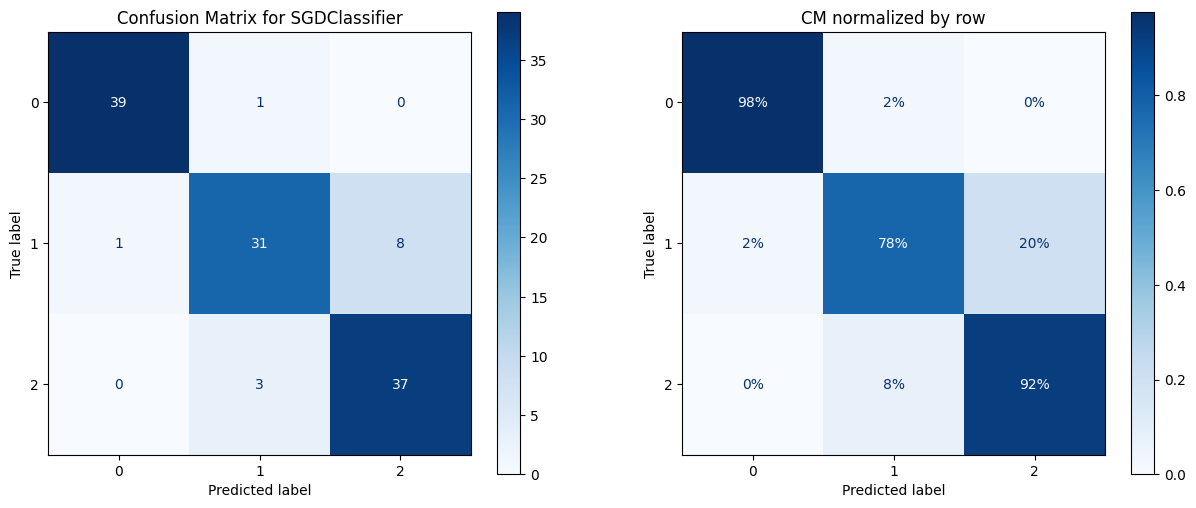

In [134]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix for SGDClassifier')

# confusion matrix normalized by row
metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format=".0%", cmap='Blues', ax=ax[1])
ax[1].set_title("CM normalized by row")
plt.show()

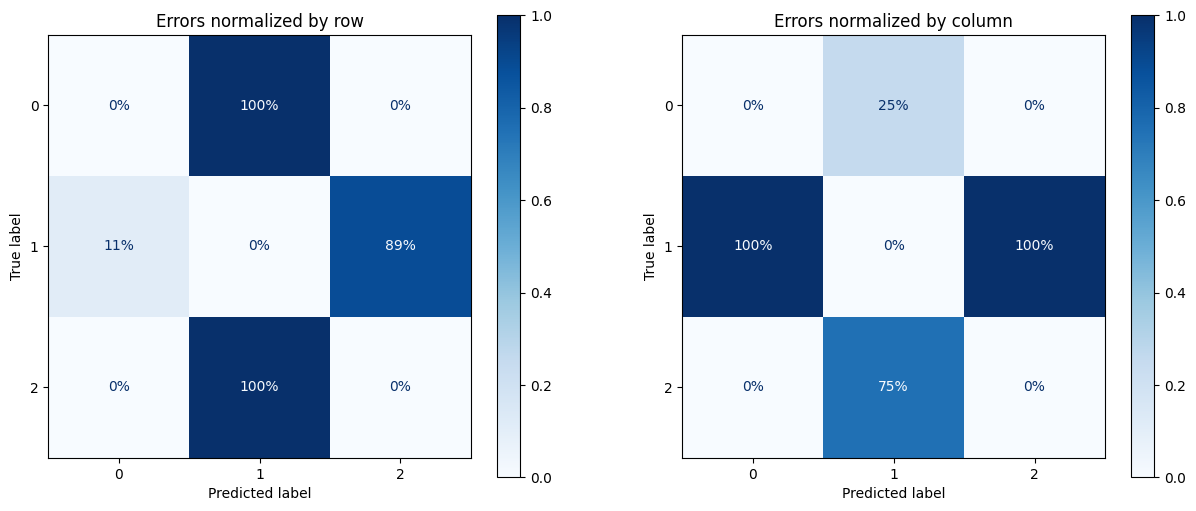

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
some_weight = (y_train_pred!=y_train)

# Normalize the confusion matrix to better interpret performance on imbalanced datasets.
# Shows percentage of predictions per actual class (row-wise normalization).
metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', sample_weight=some_weight, values_format='.0%', cmap='Blues', ax=ax[0])
ax[0].set_title("Errors normalized by row")  

# Shows percentage of predictions per actual class (column-wise normalization).
metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=some_weight, normalize='pred', values_format=".0%", ax=ax[1], cmap='Blues')
ax[1].set_title('Errors normalized by column')
plt.show()

### Confusion Matrix Interpretation

**Left Plot (Errors normalized by row)**  
- Rows represent the actual classes.  
- Values are normalized across rows (i.e., each row sums to 100%).  
- Correct predictions are excluded to emphasize misclassification patterns.  
- For example, for class 1 (Iris-versicolor), 89% of the misclassified samples were predicted as class 2 (Iris-virginica), and 11% as class 0 (Iris-setosa).  

**Right Plot (Errors normalized by column)**  
- Columns represent the predicted classes.  
- Values are normalized across columns (i.e., each column sums to 100%).  
- This plot shows the origin of each predicted label.  
- For example, of all predictions made as class 1, 75% actually came from class 2 and 25% from class 0.


The confusion matrices above provide a detailed view of the classification errors made by the SGDClassifier on the training set:

- **Standard Confusion Matrix:** Shows the absolute number of correct and incorrect predictions for each class, helping to identify which classes are most frequently misclassified.
- **Normalized by Row:** Displays the percentage of predictions per actual class, making it easier to interpret performance for each class, especially in the presence of class imbalance.
- **Errors Normalized by Row:** Highlights the distribution of errors for each true class, indicating which classes are more prone to misclassification.
- **Errors Normalized by Column:** Illustrates the proportion of errors for each predicted class, revealing if certain predicted classes are more likely to be incorrect.

These visualizations are essential for diagnosing model weaknesses and guiding further improvements in feature engineering, model selection, or hyperparameter tuning.